# **Tarea Nº 2**

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Sábado 6 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Armando Paredes ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

## Filtering rows

1. Import the `flights.csv` dataset. Find all flights that:

    a. Had an arrival delay of three or more hours

    b. Flew to Houston (IAH or HOU)

    c. Were operated by United, American, or Southwest

    d. Departed in spring (March, April, and June)

    e. Arrived more than two hours late, but didn’t leave late
    
    f. Were delayed by at least an hour, but made up over 30 minutes in flight 7. Departed between midnight and 5am (inclusive)

In [287]:
import pandas as pd

In [288]:
df = pd.read_csv("flights.csv")

# print(df)
df.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'sched_dep_time',
       'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour',
       'minute', 'time_hour'],
      dtype='object')

In [289]:
df.dep_delay.value_counts()

-5.0      24821
-4.0      24619
-3.0      24218
-2.0      21516
-6.0      20701
          ...  
 545.0        1
 443.0        1
 800.0        1
 911.0        1
 422.0        1
Name: dep_delay, Length: 527, dtype: int64

In [290]:
# Solution
df.arr_delay

aa = df.loc[ (df.arr_delay >= 3)  , : ]
#aa

In [291]:
# Solution
bb = df.loc[(df.dest == "IAH") | (df.dest == "HOU") ]
#bb

In [292]:
cc = df.loc[(df.carrier == "UA") | (df.carrier == "AA") | (df.carrier == "WN") ]
# cc

In [293]:
#march, april and june 3,4,6   df.month.value_counts
dd = df.loc[(df.month == 3)|(df.month == 4)|(df.month == 6)]
# dd

In [294]:
ee = df.loc[(df['arr_delay'] > 120) & (df['dep_delay'] <= 0)]
# ee

<AxesSubplot:>

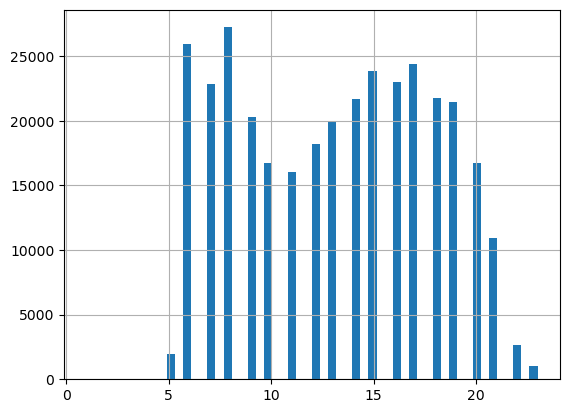

In [295]:
df.hour.hist(bins=56)  #df['time_hour'] = pd.to_datetime(df['time_hour']) # df['hour'] = df['time_hour'].dt.hour.hist()


In [296]:
# Were delayed by at least an hour, but made up over 30 minutes in flight 7. Departed between midnight and 5am (inclusive)

df['time_hour'] = pd.to_datetime(df['time_hour'])
df['hour'] = df['time_hour'].dt.hour

ff = df.loc[
    (df['dep_delay'] >= 60) &
    (df['arr_delay'] > 30) &
    (df['flight'] == 7) &
    (df['hour'] >= 0) & (df['hour'] <= 5)]
ff

#NO hay info

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour


2. How many flights have a missing dep_time? What other variables are missing? What might these rows represent?

In [297]:
ex2 = df.dep_time

print(ex2.isna().sum()) #tiene 8255

df.isna().sum() #

# Problemas técnicos o errores en la grabación de datos,
#cancelaciones o vuelos no realizados u 
#otros problemas logísticos o administrativos

8255


Unnamed: 0           0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

3. What happens to observations **with missing values in `arr_time`** when you filter by **`arr_time == 1800`**? Why? (Hint: compare `2000 == 1800`, `1800 == 1800`, and `NA == 1800`).

In [298]:
# # Solution
# ex3 = df.loc[df['arr_time']==1800]

# en las comparaciones lógicas, cualquier operación que involucre valores 
# faltantes generalmente da como resultado NA o False, y eso afecta la inclusión 
# de observaciones en conjuntos filtrados



4. What does `False & None` evaluate to? Why?

La expresión False & None se evalúa como False. Esto se debe a que en las operaciones de bits (&), False se representa como 0 y None se considera como 0 también. Entonces, la operación 0 & 0 da como resultado 0, que es equivalente a False en el contexto booleano.

Es importante tener en cuenta que en Python, False y None son diferentes, pero en contextos booleanos, ambos se consideran falsos. Sin embargo, en operaciones de bits, False se trata como 0, mientras que None se evalúa como NoneType.

## Select columns

5. Brainstorm as many distinct ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`.

In [299]:
# Solution
df.dep_time,df.dep_delay, df.arr_time, df.arr_delay
df.flight

a1 = df[['dep_time', 'dep_delay', 'arr_time', 'arr_delay']]
a1


,dep_time,dep_delay,arr_time,arr_delay
0,517.0,2.0,830.0,11.0
1,533.0,4.0,850.0,20.0
2,542.0,2.0,923.0,33.0
3,544.0,-1.0,1004.0,-18.0
4,554.0,-6.0,812.0,-25.0
...,...,...,...,...
336771,NaN,NaN,NaN,NaN
336772,NaN,NaN,NaN,NaN
336773,NaN,NaN,NaN,NaN
336774,NaN,NaN,NaN,NaN


In [300]:
# Notación de Corchetes:
a1 = df[['dep_time', 'dep_delay', 'arr_time', 'arr_delay']]

# Método loc (ubicación):
df.loc[:, ['dep_time', 'dep_delay', 'arr_time', 'arr_delay']]

# Método iloc (indexación basada en posición):
df.iloc[:, [4, 6, 7, 9]]

# Método filter (filtrado):
df.filter(items=['dep_time', 'dep_delay', 'arr_time', 'arr_delay'])

# Combinación de Indexación y Notación de Punto:
df[['dep_time', 'dep_delay', 'arr_time', 'arr_delay']]

# Método loc con Slicing para Todas las Filas:
df.loc[:, 'dep_time':'arr_delay']

# Usando at para Seleccionar Columnas Específicas:
df.loc[:, ['dep_time', 'dep_delay', 'arr_time', 'arr_delay']]

# Método xs (Seleccionar por Nombre de Columna):
df.xs(['dep_time', 'dep_delay', 'arr_time', 'arr_delay'], axis=1)

# Usando el Método get para Seleccionar Columnas:
df.get(['dep_time', 'dep_delay', 'arr_time', 'arr_delay'])

# Método reindex para Seleccionar Columnas Específicas:
df.reindex(columns=['dep_time', 'dep_delay', 'arr_time', 'arr_delay'])


C:\Users\HP SUPPORT\AppData\Local\Temp\ipykernel_25384\654248336.py:23: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  df.xs(['dep_time', 'dep_delay', 'arr_time', 'arr_delay'], axis=1)


,dep_time,dep_delay,arr_time,arr_delay
0,517.0,2.0,830.0,11.0
1,533.0,4.0,850.0,20.0
2,542.0,2.0,923.0,33.0
3,544.0,-1.0,1004.0,-18.0
4,554.0,-6.0,812.0,-25.0
...,...,...,...,...
336771,NaN,NaN,NaN,NaN
336772,NaN,NaN,NaN,NaN
336773,NaN,NaN,NaN,NaN
336774,NaN,NaN,NaN,NaN


## Sort columns

6. Sort flights to find the most delayed flights by arrival time. Hint: End your code with head(1) to only print that row.

In [301]:
# Solution
ex6 = df.sort_values(by='dep_delay',ascending=True)
ex6.head(1)


,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
89673,89674,2013,12,7,2040.0,2123,-43.0,40.0,2352,48.0,B6,97,N592JB,JFK,DEN,265.0,1626,21,23,2013-12-07 21:00:00


7. Find the top 5 flights that left earliest relative to their scheduled departure. Only show the tail number, date and number of minutes early they departed at.

In [302]:
# Filtrar los vuelos que salieron antes
earliest_dep = df[df['dep_delay'] < 0]


new_data = earliest_dep[['tailnum', 'year', 'month', 'day', 'dep_delay']]

# ordenar
ex7 = new_data.sort_values(by='dep_delay').head(5)
ex7

,tailnum,year,month,day,dep_delay
89673,N592JB,2013,12,7,-43.0
113633,N612DL,2013,2,3,-33.0
64501,N825AS,2013,11,10,-32.0
9619,N934DL,2013,1,11,-30.0
24915,N208FR,2013,1,29,-27.0


8. How could you sort all missing values to the start? 

In [303]:
# Solution
ex8 = new_data.sort_values(by='dep_delay',ascending=True, na_position='first').head(5)
ex8

,tailnum,year,month,day,dep_delay
89673,N592JB,2013,12,7,-43.0
113633,N612DL,2013,2,3,-33.0
64501,N825AS,2013,11,10,-32.0
9619,N934DL,2013,1,11,-30.0
24915,N208FR,2013,1,29,-27.0


## Add new variables 

9. Currently `dep_time` and `arr_time` are convenient to look at, but hard to compute with because they’re not really continuous numbers. Convert them to number of minutes since midnight in new vars called `arr_time_min` and `dep_time_min`

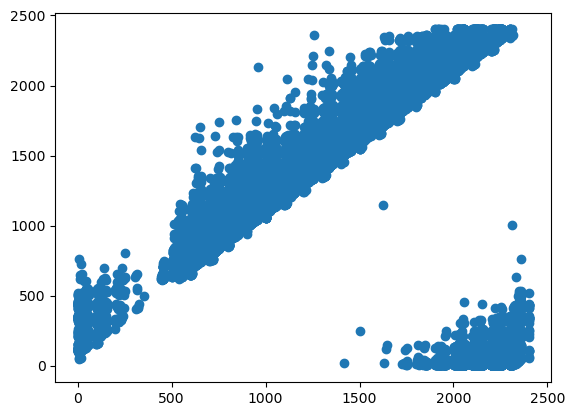

In [304]:
plt.scatter(df['dep_time'], df['arr_time'])

        dep_time  arr_time
0            300       300
1            300       300
2            300       300
3            300       300
4            360       360
...          ...       ...
336771       840       840
336772      1320      1320
336773       720       720
336774       660       660
336775       480       480

[336776 rows x 2 columns]
        dep_time  arr_time
0            300       300
1            300       300
2            300       300
3            300       300
4            360       360
...          ...       ...
336771       840       840
336772      1320      1320
336773       720       720
336774       660       660
336775       480       480

[336776 rows x 2 columns]


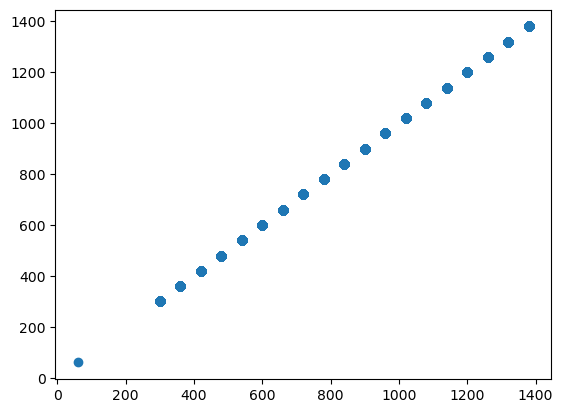

In [305]:
# Solution

# convertir las columnas dep_time y arr_time a formato de tiempo
df['dep_time'] = pd.to_datetime(df['time_hour']).dt.hour * 60 + pd.to_datetime(df['time_hour']).dt.minute
df['arr_time'] = pd.to_datetime(df['time_hour']).dt.hour * 60 + pd.to_datetime(df['time_hour']).dt.minute


print(df[['dep_time', 'arr_time']])
print(df[['dep_time', 'arr_time']])

plt.scatter(df['dep_time'],df['arr_time'])

10. Make a plot to compare `air_time` with `arr_time_min` - `dep_time_min`

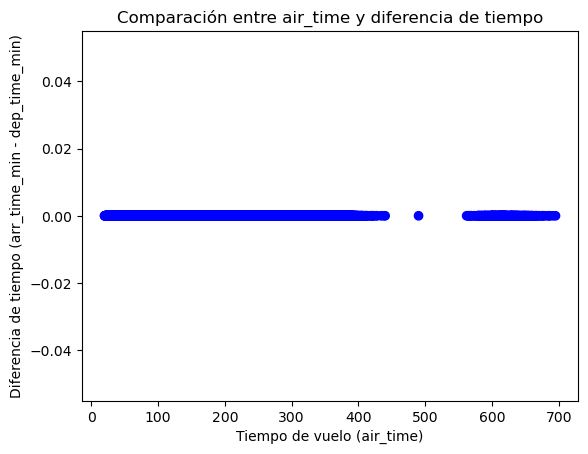

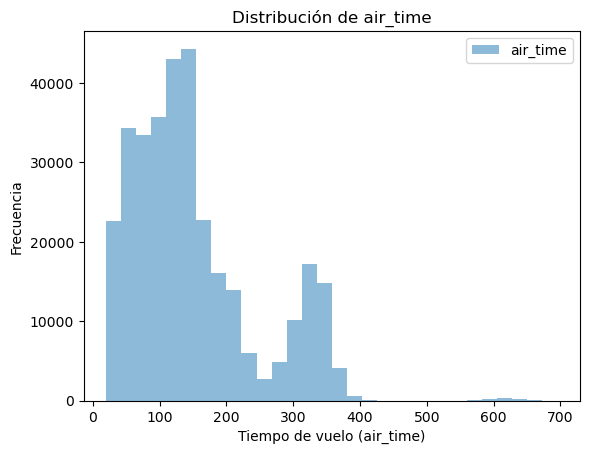

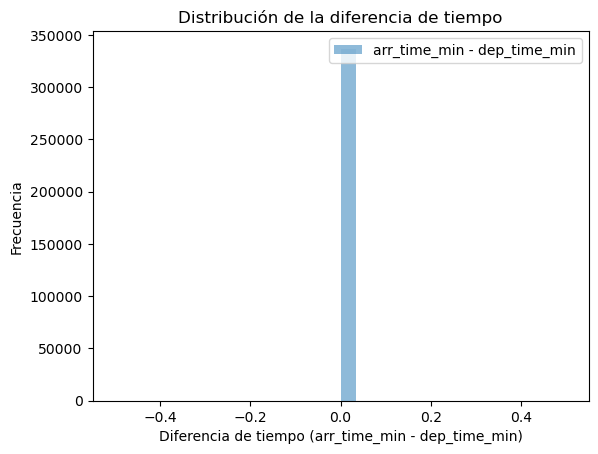

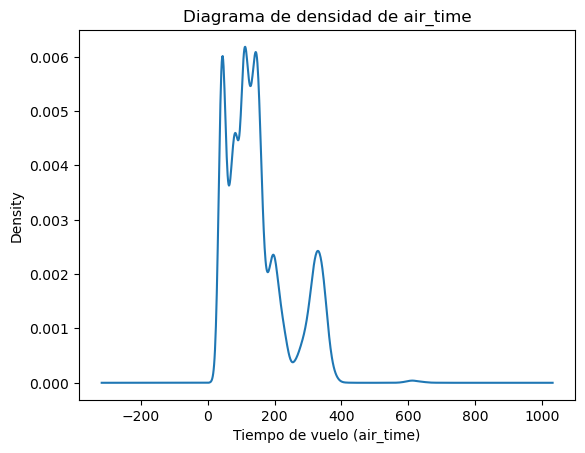

In [306]:
# Solution

import matplotlib.pyplot as plt

# diferencia entre arr_time_min y dep_time_min
df['time_difference'] = df['arr_time'] - df['dep_time']

# gráfico de dispersión para comparar air_time con la diferencia de tiempo
#plt.scatter(df['air_time'], df['time_difference'])
plt.scatter(df['air_time'], df['time_difference'], c=['blue' if pd.notna(x) else 'red' for x in df['air_time']])
plt.title('Comparación entre air_time y diferencia de tiempo')
plt.xlabel('Tiempo de vuelo (air_time)')
plt.ylabel('Diferencia de tiempo (arr_time_min - dep_time_min)')
#plt.ylim([-0.01, 0.01])
plt.show()


# Histograma para air_time
plt.hist(df['air_time'], bins=30, alpha=0.5, label='air_time')
plt.legend()
plt.title('Distribución de air_time')
plt.xlabel('Tiempo de vuelo (air_time)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para arr_time_min - dep_time_min
plt.hist(df['time_difference'], bins=30, alpha=0.5, label='arr_time_min - dep_time_min')
plt.legend()
plt.title('Distribución de la diferencia de tiempo')
plt.xlabel('Diferencia de tiempo (arr_time_min - dep_time_min)')
plt.ylabel('Frecuencia')
plt.show()



# Diagrama de densidad para air_time
df['air_time'].plot.kde()
plt.title('Diagrama de densidad de air_time')
plt.xlabel('Tiempo de vuelo (air_time)')
plt.show()



11. We expect `air_time` and `arr_time_min` - `dep_time_min` to be the same, but they’re not. Why not?
Identify a major data issue and subtle one.

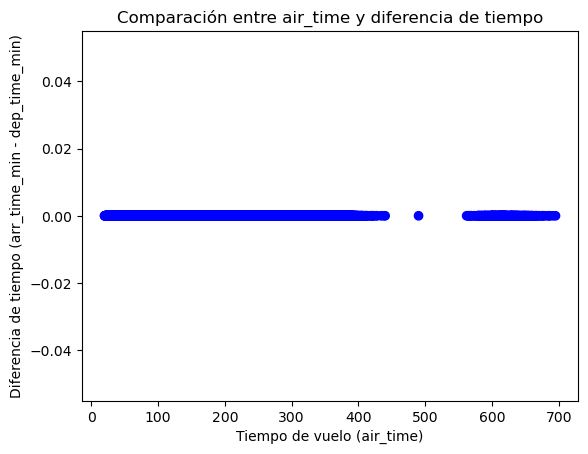

Unnamed: 0                           1
year                              2013
month                                1
day                                  1
dep_time                           300
sched_dep_time                     515
dep_delay                          2.0
arr_time                           300
sched_arr_time                     819
arr_delay                         11.0
carrier                             UA
flight                            1545
tailnum                         N14228
origin                             EWR
dest                               IAH
air_time                         227.0
distance                          1400
hour                                 5
minute                              15
time_hour          2013-01-01 05:00:00
time_difference                      0
Name: 0, dtype: object


In [307]:
# Solution
# Filtrar los datos para excluir valores nulos en air_time, dep_time o arr_time
filter = df.dropna(subset=['air_time', 'dep_time', 'arr_time'])


# Luego, realiza el análisis con los datos filtrados

# diferencia entre arr_time_min y dep_time_min
df['time_difference'] = df['arr_time'] - df['dep_time']

# gráfico de dispersión para comparar air_time con la diferencia de tiempo
#plt.scatter(df['air_time'], df['time_difference'])
plt.scatter(df['air_time'], df['time_difference'], c=['blue' if pd.notna(x) else 'red' for x in df['air_time']])
plt.title('Comparación entre air_time y diferencia de tiempo')
plt.xlabel('Tiempo de vuelo (air_time)')
plt.ylabel('Diferencia de tiempo (arr_time_min - dep_time_min)')
#plt.ylim([-0.01, 0.01])
plt.show()

#  índices de registros con mayores diferencias
max_difference_indices = (df['arr_time'] - df['dep_time']).abs().idxmax()
print(df.loc[max_difference_indices])

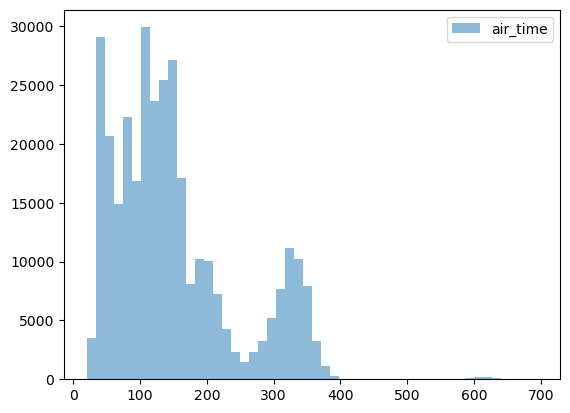

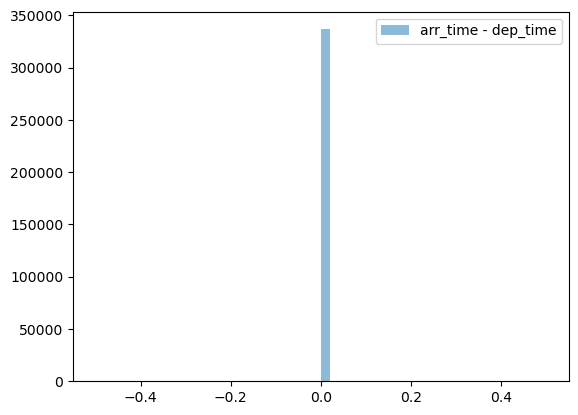

In [308]:
# Histograma para air_time
plt.hist(df['air_time'].dropna(), bins=50, alpha=0.5, label='air_time')
plt.legend()
plt.show()

# Histograma para arr_time_min - dep_time_min
plt.hist(df['arr_time'] - df['dep_time'], bins=50, alpha=0.5, label='arr_time - dep_time')
plt.legend()
plt.show()


12. Implement your fix to the major probelm. Remake the plot from the previous question.

Valores faltantes en arr_time_min: 0
Valores faltantes en dep_time_min: 0


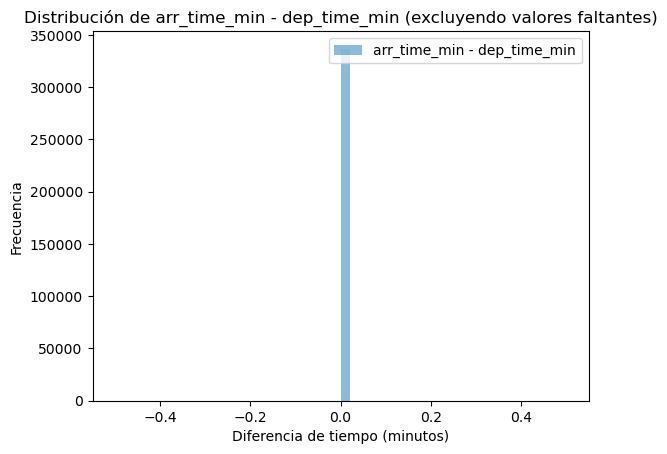

In [309]:
# Solution

# Verificar la presencia de valores faltantes
print("Valores faltantes en arr_time_min:", df['arr_time'].isnull().sum())
print("Valores faltantes en dep_time_min:", df['dep_time'].isnull().sum())

# Verificar la distribución de arr_time_min - dep_time_min excluyendo los valores faltantes
non_null_differences = (df['arr_time'] - df['dep_time']).dropna()

plt.hist(non_null_differences, bins=50, alpha=0.5, label='arr_time_min - dep_time_min')
plt.title('Distribución de arr_time_min - dep_time_min (excluyendo valores faltantes)')
plt.xlabel('Diferencia de tiempo (minutos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()




13. Find the 10 most delayed flights 

In [310]:
# Solution


mdf = df.sort_values(by='dep_delay', ascending=False)


top = mdf.head(10)

# Imprimir el resultado
print(top[['carrier', 'flight', 'dep_delay']])


       carrier  flight  dep_delay
7072        HA      51     1301.0
235778      MQ    3535     1137.0
8239        MQ    3695     1126.0
327043      AA     177     1014.0
270376      MQ    3075     1005.0
173992      DL    2391      960.0
151974      DL    2119      911.0
247040      DL    2007      899.0
270987      DL    2047      898.0
87238       AA     172      896.0


## Summarizing grouped data

14. Calculate average delays by destination for flights originating in NYC. Create a variable which ranks destinations from worst to best, where 1 is the worst rank.

In [311]:
df.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'sched_dep_time',
       'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour',
       'minute', 'time_hour', 'time_difference'],
      dtype='object')

In [312]:
# filtro de vuelos que tienen su origen en NYC
nyc_flights = df[df['origin'].isin(['EWR', 'LGA', 'JFK'])]

# retrasos promedio por destino
average_delays = nyc_flights.groupby('dest')['dep_delay'].mean().reset_index()

# nueva variable que contenga el rango de los destinos desde el peor hasta el mejor
average_delays['rank'] = average_delays['dep_delay'].rank(ascending=False, method='min')

# ordenar rango (del peor al mejor)
average_delays = average_delays.sort_values(by='rank')

print(average_delays[['dest', 'dep_delay', 'rank']])


    dest  dep_delay   rank
18   CAE  35.570093    1.0
101  TUL  34.906355    2.0
67   OKC  30.568807    3.0
9    BHM  29.694853    4.0
103  TYS  28.493955    5.0
..   ...        ...    ...
98   STT   4.613900  101.0
34   EYW   3.647059  102.0
77   PSP  -2.944444  103.0
50   LEX  -9.000000  104.0
51   LGA        NaN    NaN

[105 rows x 3 columns]


15. Which plane (`tailnum`) has the most minutes of delays total?

In [313]:
# Solution

# información de tiempo de salida y retraso de salida
delayed_flights = df.dropna(subset=['dep_time', 'dep_delay'])

#  la suma total de minutos de retraso por avión
total_delay_by_plane = delayed_flights.groupby('tailnum')['dep_delay'].sum().reset_index()

#  el avión con la mayor cantidad total de minutos de retraso
most_delayed_plane = total_delay_by_plane.loc[total_delay_by_plane['dep_delay'].idxmax()]


print("El avión con la mayor cantidad total de minutos de retraso es:", most_delayed_plane['tailnum'])
print("Total de minutos de retraso:", most_delayed_plane['dep_delay'])


El avión con la mayor cantidad total de minutos de retraso es: N15910
Total de minutos de retraso: 7758.0


16. Which airlines only offer flights from New York to one other airport?

In [314]:
# Solution

# group by carrier and count unique destinations
unique_destinations = df.groupby('carrier')['dest'].nunique().reset_index()

# filter airlines that have only one unique destination
airlines_with_one_destination = unique_destinations[unique_destinations['dest'] == 1]

print("Airlines that only offer flights from New York to one other airport:")
print(airlines_with_one_destination[['carrier']])


Airlines that only offer flights from New York to one other airport:
  carrier
2      AS
6      F9
8      HA


17. Calculate the median arrival delay by airline.

In [315]:
# Solution

# group by carrier and calculate the median arrival delay
median_arrival_delay_by_airline = df.groupby('carrier')['arr_delay'].median().reset_index()

print("Median arrival delay by airline:")
print(median_arrival_delay_by_airline[['carrier', 'arr_delay']])


Median arrival delay by airline:
   carrier  arr_delay
0       9E       -7.0
1       AA       -9.0
2       AS      -17.0
3       B6       -3.0
4       DL       -8.0
5       EV       -1.0
6       F9        6.0
7       FL        5.0
8       HA      -13.0
9       MQ       -1.0
10      OO       -7.0
11      UA       -6.0
12      US       -6.0
13      VX       -9.0
14      WN       -3.0
15      YV       -2.0


18. ExpressJet has a median arrival delay of -1 minutes while US Airways has a median arrival delay of -6 minutes. Does this tell you that US Airways is a more reliable airline? Why or why not?


Solution

\textcolor{blue}{la mediana es solo un indicador y no proporciona una imagen completa de la confiabilidad de una aerolínea. Es importante considerar múltiples métricas y factores para obtener una evaluación más precisa de la confiabilidad de una aerolínea.}








19. Median arrival delay may not be the best metric for our needs. Brainstorm at least 4 additional ways to assess the typical delay characteristics of a group of flights.

 Solution

Promedio de Retraso: A diferencia de la mediana, el promedio (media aritmética) puede proporcionar una imagen de la tendencia general de retrasos. Sin embargo, es sensible a los valores extremos.

Porcentaje de Vuelos Puntuales: Determinar el porcentaje de vuelos que llegan a tiempo (sin retraso) puede ser una métrica útil para evaluar la puntualidad de una aerolínea.

Desviación Estándar: La desviación estándar puede indicar la dispersión de los retrasos. Una desviación estándar más alta podría sugerir una mayor variabilidad en los tiempos de llegada.

Histograma de Retrasos: Visualizar un histograma de los retrasos puede proporcionar una comprensión más detallada de la distribución de los tiempos de llegada y resaltar patrones específicos, como picos de retrasos.
Evaluar las tendencias a lo largo del tiempo, como patrones estacionales o variaciones según el día de la semana, puede ofrecer información valiosa sobre la confiabilidad de una aerolínea.
Análisis de Tendencias Temporales: 

20. Write a code which calculates your delay measures separately by airline. Do particular airlines perform poorly on multiple metrics?

In [316]:
# Solution

# promedio de retraso por aerolínea
prom = df.groupby('carrier')['arr_delay'].mean()

# porcentaje de vuelos puntuales por aerolínea
percent = df[df['arr_delay'] <= 0].groupby('carrier').size() / df.groupby('carrier').size()

# desviación estándar de retraso por aerolínea
std = df.groupby('carrier')['arr_delay'].std()

# métricas 
metrics_by_airl = pd.DataFrame({
    'Average_Delay': prom,
    'On_Time_Percentage': percent,
    'Std_Dev_Delay': std
})


print(metrics_by_airl)


         Average_Delay  On_Time_Percentage  Std_Dev_Delay
carrier                                                  
9E            7.379669            0.577302      50.086778
AA            0.364291            0.648996      42.516182
AS           -9.930889            0.728291      36.482633
B6            9.457973            0.557152      42.842297
DL            1.644341            0.649449      44.402289
EV           15.796431            0.491463      49.861469
F9           21.920705            0.421898      61.645997
FL           20.115906            0.392638      54.087671
HA           -6.915205            0.716374      75.129420
MQ           10.774733            0.505512      43.174306
OO           11.931034            0.593750      48.584926
UA            3.558011            0.606154      40.984344
US            2.129595            0.607811      33.066952
VX            1.764464            0.652848      49.966450
WN            9.649120            0.549084      46.877702
YV           1